# 머신러닝 프로젝트 진행 순서

1. 데이터 분석 문제 정의
> - 이슈 파악 및 문제 도출
> - 분석 데이터 정의
> - 머신러닝 문제 정의
> - 베이스라인 선정

2. 데이터 수집 및 정제
> - 데이터 마트 생성
> - 데이터 정합성 평가
> - 데이터 취합
> - 데이터 포맷 통일

3. 탐색적 데이터 분석
> - 결측치 처리
> - 클래식 불균형 문제
> - 데이터 시각화
> - 통계량 분석

4. 피처 엔지니어링
> - 차원의 저주
> - 상관관계 분석
> - 피쳐 추출
> - 범주형 변수 인코딩

5. 예측 모델 개발 및 평가
> - 예측 모델 학습
> - 모델 성능 개선
> - 성능 평가
> - 최종 모델 배포 


# [PUBG Finish Placement Prediction (Kernels Only)](https://www.kaggle.com/competitions/pubg-finish-placement-prediction/overview)
- Can you predict the battle royale finish of PUBG Players?

## 데이터 분석 문제 정의

- 이슈 파악 및 문제 도출
> - PUBG 게임을 통해 집계된 아래 통계 데이터를 확인하고, 최종 게임 내 통계 및 초기 플레이어 등급에서 최종 배치를 예측.
- 분석 데이터 정의
> - PUBG 게임에 대해 PUBG Developer API를 통해 수집된 데이터
- 머신러닝 문제 정의
> - 1(1위)에서 0(최후)까지의 척도로 최종 통계를 기반으로 선수의 최종 순위를 예측하는 모델을 찾는 것이 목표
> - 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 최적의 Regression Model을 사용하고자 함.
- BaseLine 선정
> - Data 관련
>    - 결측치는 모두 제거
>    - Data Leakage와 연관된 column 제거
>    - Objective, Categorical type의 column은 모두 제거
> - Modeling 관련
>    - BaseModel은 xgboostRegressor로 선정
>    - 'target'을 제외한 모든 columns에 대한 학습 진행


## 데이터 수집 및 정제

- **Data** : Kaggle에서 제공하는 아래의 파일을 사용 예정
> - train_V2.csv
> - test_V2.csv  
      
- **Data fileds**
>  - **Id** - 플레이어 아이디
>  - **groupId** - 매치 내에서 그룹을 식별하기 위한 ID입니다.   
        같은 그룹의 플레이어가 다른 경기에서 플레이하는 경우 매번 다른 groupId를 갖습니다.
>  - **matchId** - 일치를 식별하는 ID입니다.   
        훈련 세트와 테스트 세트 모두에 일치하는 항목이 없습니다.
>  - **assists** - 이 플레이어가 피해를 주었고 팀원들에 의해 사망한 적 플레이어의 수입니다. 팀원과 같이 싸웠다는 지표
>  - **boosts** - 사용된 부스트 아이템의 수입니다.
>  - **DamageDealt** - 가한 총 피해량입니다. 
        참고: 자신이 입힌 피해는 차감됩니다. 팀 합산
>  - **DBNO** - 다운이된 상 플레이어의 수입니다.
        - Down But No Out'의 약자입니다. 듀오나 스쿼드 플레이 중 체력(HP)을 모두 잃으면 이 모드로 진입합니다.   
        - 이 모드에서 듀오 또는 분대원은 당신을 치유할 수 있으며 이것이 우리가 이것을 아웃으로 간주하지 않는 이유입니다.   
        - 'Revive State'는 BATTLEGROUNDS의 기능으로 쓰러진 분대원을 소생시키는 데 사용할 수 있습니다.   
        - HP가 0이 되면 DBNO 상태가 됩니다.  
        - 아이템을 크롤링 및 드롭할 수만 있으며 이 상태에서는 아이템을 쏘거나 사용할 수 없습니다.
>  - **headshotKills** - 헤드샷으로 사망한 적 플레이어의 수입니다.
>  - **heals** - 사용된 치유 아이템의 수입니다.
        - PUBG에는 붕대, 응급 처치 키트 및 의료 키트의 세 가지 기본 heals 옵션이 있습니다.
>  - **killPlace** - 죽인 적 플레이어 수의 경기 순위입니다.  
>  - **killPoints** - 플레이어의 킬 기반 외부 순위입니다.  
        (이것을 킬만 중요한 Elo 순위라고 생각하십시오.)  
        rankPoints에 -1 이외의 값이 있는 경우 killPoints의 0은 "없음"으로 처리되어야 합니다.
>  - **kills** - 죽인 적 플레이어의 수.
>  - **killStreaks** - 짧은 시간에 죽인 적 플레이어의 최대 수입니다.
>  - **longKill** - 사망 시 사망한 플레이어와 플레이어 사이의 최장 거리입니다.  
        플레이어를 쓰러뜨리고 drive away하면 가장 긴 킬 통계가 나올 수 있으므로 이는 오해의 소지가 있습니다.
>  - **matchDuration** - 경기 시간(초)입니다.
>  - **matchType** - 데이터의 출처인 게임 모드를 식별하는 문자열입니다.   
        표준 모드는 "solo", "duo", "squad", "solo-fpp", "duo-fpp" 및 "squad-fpp"입니다.  
        다른 모드는 이벤트 또는 사용자 지정 일치에서 가져온 것입니다.
>  - **maxPlace** - 경기에서 데이터가 있는 최악의 위치입니다.  
        데이터가 배치를 건너뛰는 경우가 있으므로 numGroups와 일치하지 않을 수 있습니다.
>  - **numGroups** - 경기에서 데이터가 있는 그룹의 수입니다.
>  - **rankPoints** - 플레이어의 Elo와 같은 순위입니다.  
        이 순위는 일관성이 없으며 API의 다음 버전에서 더 이상 사용되지 않으므로 주의해서 사용하십시오.  
        -1 값은 "없음"을 대신합니다.
>  - **revives** - 이 플레이어가 팀원을 소생시킨 횟수입니다.
>  - **rideDistance** - 미터로 측정한 차량의 총 이동 거리입니다.
>  - **roadKills** - 차량에 있는 동안 킬 수입니다.
>  - **swimDistance** - 미터로 측정한 수영으로 이동한 총 거리.
>  - **teamKills** - 이 플레이어가 팀원을 죽인 횟수입니다.
>  - **vehicleDestroys** - 파괴된 차량의 수입니다.
>  - **walkDistance** - 미터로 측정한 도보로 이동한 총 거리.
>  - **weaponsAcquired** - 획득한 무기의 수입니다.
>  - **winPoints** - 승리 기반 플레이어의 외부 순위입니다.  
        (이것을 승리만이 중요한 Elo 순위라고 생각하십시오.)  
        rankPoints에 -1 이외의 값이 있는 경우 winPoints의 0은 "없음"으로 처리되어야 합니다.
>  - **winPlacePerc** - 예측 대상입니다.  
        이것은 백분위수 승리 배치로, 1은 1위, 0은 경기의 마지막 순위에 해당합니다.  
        numGroups가 아닌 maxPlace에서 계산되므로 일치 항목에서 청크가 누락될 수 있습니다.


## 탐색적 데이터 분석

### 데이터 기초 파악

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as grs
import seaborn as sns

# 머신러닝 모델
#    Linear Regression
from sklearn.linear_model import LinearRegression
#    Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
#    Lasso
from sklearn.linear_model import Lasso
#    Ridge
from sklearn.linear_model import Ridge
#    SVR
from sklearn.svm import SVR
#    Decision Tree
from sklearn.tree import DecisionTreeRegressor
#    RandomForest
from sklearn.ensemble import RandomForestRegressor
#    ensenble
from sklearn.ensemble import VotingClassifier , VotingRegressor
#    lightgbm
import lightgbm as lgb
from lightgbm.sklearn import LGBMRegressor
#    xgboost
import xgboost as xgb
from xgboost.sklearn import XGBRegressor     
#    MLPRegressor
from sklearn.neural_network import MLPRegressor

# 머신러닝 회귀모델 평가지표
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error, confusion_matrix,accuracy_score

# scaling
#   StandardScaler를 이용해서 학습하면 R-squared를 유지하면서 Cond. No.를 줄일수 있습니다.
from sklearn.preprocessing import StandardScaler     # 평균이 0과 표준편차가 1이 되도록 변환.
from sklearn.preprocessing import MinMaxScaler           # 최대값이 각각 1, 최소값이 0이 되도록 변환록 변환.
from sklearn.preprocessing import RobustScaler           # 중앙값(median) 0이 되도록 변환
from sklearn.preprocessing import Normalizer             # 0을 기준으로 절대값이 가장 큰 수가 1또는 -1이 되도록 변환

scaler_st = StandardScaler()
scaler_mm = MinMaxScaler()
scaler_rs = RobustScaler()
scaler_nm = Normalizer()

# 데이터셋 분리
from sklearn.model_selection import train_test_split 

# VIF 지표 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

# KFold(CV), partial : 데이터 검증
from sklearn.model_selection import KFold
from functools import partial

# hyper-parameter tuning을 위한 라이브러리, optuna
import optuna

# # pandas 실수 출력 셋팅
# pd.options.display.float_format = '{:.4f}'.format

In [2]:
base_path = '../../../Machine-Running_LJW/Group Project/'

train = pd.read_csv(base_path + 'train_01.base.csv')

# DataFrame 출력 시 최대 행 수 지정
# pd.set_option('display.max_rows',None)   

# DataFrame 출력 시 최대 열수 지정
# pd.set_option('display.max_columns',30)   

train

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,1241,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,0,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,0,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,0,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,0,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446960,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,1029,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446961,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,0,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446962,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,0,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446963,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,0,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [14]:
# # Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
# def reduce_mem_usage(df):
#     """ iterate through all the columns of a dataframe and modify the data type
#         to reduce memory usage.        
#     """
#     #start_mem = df.memory_usage().sum() / 1024**2
#     #print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

#     for col in df.columns:
#         col_type = df[col].dtype

#         if col_type != object:
#             c_min = df[col].min()
#             c_max = df[col].max()
#             if str(col_type)[:3] == 'int':
#                 if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
#                     df[col] = df[col].astype(np.int8)
#                 elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
#                     df[col] = df[col].astype(np.int16)
#                 elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
#                     df[col] = df[col].astype(np.int32)
#                 elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
#                     df[col] = df[col].astype(np.int64)  
#             else:
#                 if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
#                     df[col] = df[col].astype(np.float16)
#                 elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
#                     df[col] = df[col].astype(np.float32)
#                 else:
#                     df[col] = df[col].astype(np.float64)

#     #end_mem = df.memory_usage().sum() / 1024**2
#     #print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
#     #print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

#     return df

In [15]:
# train = reduce_mem_usage(train)
# train

## 피처 엔지니어링 및 모델링

1. kill 관련 columns   
    > 01) assists                 :  0.2994  
    > 02) damageDealt             :  0.4405  
    > 03) DBNOs                   :  0.2800  
    > 04) headshotKills           :  0.2777  
    > 05) killPlace               : -0.7191  
    > 06) kills                   :  0.4199  
    > 07) killStreaks             :  0.3766  
    > 08) longestKill             :  0.4102  
    > 09) roadKills               :  0.0345  
    > 10) teamKills               :  0.0159  
    > 11) weaponsAcquired         :  0.5838  

2. heal 관련 columns  
    > 1) boosts                   :  0.6342  
    > 2) heals                    :  0.4279  
    > 3) revives                  :  0.2409  
    
3. move 관련 columns  
    > 1) walkDistance             :  0.8109  
    > 2) rideDistance             :  0.3429  
    > 3) swimDistance             :  0.1496  
    
4. 기타 columns  
    > 01) killPoints              :  0.0129  
    > 02) matchDuration           : -0.0052  
    > 03) maxPlace                :  0.0374  
    > 04) numGroups               :  0.0396  
    > 05) rankPoints              :  0.0135  
    > 06) vehickeDestroys         :  0.0734  
    > 07) winPoints               :  0.0071  

- 1차

※ 사용할 column 선택

1. 'kills' 관련 columns 관련
>    - target과의 상관계수는 높지 않음  
>    - 그러나, damageDealt, killStreaks, DBNOs, headshotKills, longestKill과의 상관계수가 높은 편에 속하기 때문에 컬럼 제거  
>    - 또한, kill 관련 columns와의 VIF 수치가 10 근처 혹은 이상이기에 제외해야 한다고 판단.
>    - objective columns 삭제

2. 'heals' 관련 columns 관련
>    - 특이점이 없다 판단하여 모두 사용

3. 'ride' 관련 columns 관련
>    - 특이점이 없다 판단하여 모두 사용

4. 기타 columns 관련
>    - target과의 상관계수가 매우 낮으며, VIF Factor 수치가 높은 편이기 때문에 모두 제거
>    - killPoints, matchDuration, matchDuration, maxPlace, numGroups, rankPoints, vehickeDestroys, winPoints

5. object columns 관련
>    - objective columns의 경우, 1차 에서는 모두 제거 후 학습 진행

### 함수 정의
- 모델링에 사용할 모든 함수 정의

In [100]:
# DataFrame 수정 함수


### excols : 데이터프레임의 컬럼들 중 해당 컬럼들을 제외한 컬럼들을 리스트로 반환
def excols(df, cols):
    return [i for i in list(df.columns) if i not in cols]

### sldf : 지정한 데이터프레임에서 해당 컬럼들의 데이터만 추출
def sldf(df, cols):
    return df[cols]

### exdf : 지정한 데이터프레임에서 해당 컬럼들을 제외한 데이터만 추출
def exdf(df, cols):
    return df[excols(df,cols)]

# 모델링 관련 함수

### 지정 방법으로 Scaling 해주는 함수
def scale(df, scaler):
    return scaler.fit_transform(df)

### DataFrame에서 X와 Y를 구분해주는 함수

def x(df):
    X = df.drop(columns='winPlacePerc')
    return X

def y(df):
    y = df[['winPlacePerc']]
    return y  

### X와 y 데이터를 train / valid로 구분해주는 함수
def sep_xy(X, y):
    return train_test_split(X, y, test_size=0.2, random_state=42)

### 모델에 따른 학습 진행 함수
def cal_mae(X, y, func):
        # 데이터셋 분리
    X_train, X_valid, y_train, y_valid = sep_xy(X,y)
    
        # 학습
    model = func().fit(X_train, y_train)
    
        # 모델 평가
    y_pred = model.predict(X_valid)
    return mean_absolute_error(y_valid, y_pred)

### 지정 컬럼 대상 학습

0. objective columns 제거

In [4]:
# 타입별 column 종류 분류

num_columns = train.select_dtypes(exclude=['object']).columns
obj_columns = train.select_dtypes('object').columns

print(f'▶ numerical columns = {num_columns} → 총 {len(num_columns)}개의 columns')
print(f'▶ objective columns = {obj_columns} → 총 {len(obj_columns)}개의 columns')

▶ numerical columns = Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'maxPlace', 'numGroups', 'rankPoints', 'revives', 'rideDistance',
       'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys',
       'walkDistance', 'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object') → 총 24개의 columns
▶ objective columns = Index(['Id', 'groupId', 'matchId', 'matchType'], dtype='object') → 총 4개의 columns


#### 상관관계 기준

In [5]:
# 상관계수 확인

corr = train.corr()
corr

# 'winPlacePerc' columns와의 상관계수 확인

corr_w = corr['winPlacePerc'].sort_values(ascending = False)
corr_w = corr_w.drop('winPlacePerc')
corr_w.to_frame()

,winPlacePerc
walkDistance,0.810888
boosts,0.634234
weaponsAcquired,0.583806
damageDealt,0.440507
heals,0.427857
kills,0.419916
longestKill,0.410154
killStreaks,0.377566
rideDistance,0.342915
assists,0.299441


In [6]:
# 상관계수가 높은 순으로 train의 columns를 list로 저장

tr_cols = corr_w.index
tr_cols
# 총 23개의 columns

Index(['walkDistance', 'boosts', 'weaponsAcquired', 'damageDealt', 'heals',
       'kills', 'longestKill', 'killStreaks', 'rideDistance', 'assists',
       'DBNOs', 'headshotKills', 'revives', 'swimDistance', 'vehicleDestroys',
       'numGroups', 'maxPlace', 'roadKills', 'teamKills', 'rankPoints',
       'killPoints', 'winPoints', 'matchDuration'],
      dtype='object')

In [7]:
# numerical columns만 추출

train_nums = sldf(train, num_columns)
train_nums

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,kills,killStreaks,longestKill,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.00,0,0,0,1241,0,0,0.00,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,0,0,91.47,0,0,0,0,0,0,0.00,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1,0,68.00,0,0,0,0,0,0,0.00,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,0,0,32.90,0,0,0,0,0,0,0.00,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,0,0,100.00,0,0,0,0,1,1,58.53,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446960,0,0,0.00,0,0,0,1029,0,0,0.00,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446961,0,1,44.15,0,0,0,0,0,0,0.00,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446962,0,0,59.06,0,0,0,0,0,0,0.00,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446963,0,4,180.40,1,1,2,0,2,1,98.50,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [8]:
pd.set_option('display.max_columns',30)   

y = train_nums[['winPlacePerc']]
X = train_nums.drop(columns='winPlacePerc')
display(y)
display(X)

,winPlacePerc
0,0.4444
1,0.6400
2,0.7755
3,0.1667
4,0.1875
...,...
4446960,0.1786
4446961,0.2935
4446962,0.4815
4446963,0.8000


,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,0,0,0.00,0,0,0,1241,0,0,0.00,1306,28,26,-1,0,0.0000,0,0.000,0,0,244.80,1,1466
1,0,0,91.47,0,0,0,0,0,0,0.00,1777,26,25,1484,0,0.0045,0,11.040,0,0,1434.00,5,0
2,1,0,68.00,0,0,0,0,0,0,0.00,1318,50,47,1491,0,0.0000,0,0.000,0,0,161.80,2,0
3,0,0,32.90,0,0,0,0,0,0,0.00,1436,31,30,1408,0,0.0000,0,0.000,0,0,202.70,3,0
4,0,0,100.00,0,0,0,0,1,1,58.53,1424,97,95,1560,0,0.0000,0,0.000,0,0,49.75,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446960,0,0,0.00,0,0,0,1029,0,0,0.00,1873,29,28,-1,0,1292.0000,0,0.000,0,0,1019.00,3,1507
4446961,0,1,44.15,0,0,0,0,0,0,0.00,1435,93,93,1501,0,0.0000,0,0.000,0,0,81.70,6,0
4446962,0,0,59.06,0,0,0,0,0,0,0.00,1321,28,28,1500,0,0.0000,0,2.184,0,0,788.70,4,0
4446963,0,4,180.40,1,1,2,0,2,1,98.50,1373,26,25,1418,2,0.0000,0,0.000,0,0,2748.00,8,0


In [29]:
# 상관관계 기준으로 상위 7개부터 하나씩 늘려나가면서 mae 계산해보는 함수

def mk_maedf(func, cols, scaler):         # scaler 적용하지 않을 거라면 'N' 을 입력하면 됨.

    mae_list = []

    for i in range(7,len(cols)+1):
        X = train_nums.drop(columns='winPlacePerc')
        X = scale(X[cols[:i]], scaler)

        mae_list.append(cal_mae(X, y, func))

    mae_df = pd.DataFrame(data=mae_list, index=[f'상위 {i}개 columns 대상' for i in list(range(7,24))], columns=['mae'])
    return(mae_df)

In [10]:
mk_maedf(LinearRegression, tr_cols, scaler_st)

,mae
상위 7개 columns 대상,0.129849
상위 8개 columns 대상,0.129461
상위 9개 columns 대상,0.128959
상위 10개 columns 대상,0.128907
상위 11개 columns 대상,0.127838
상위 12개 columns 대상,0.127836
상위 13개 columns 대상,0.127726
상위 14개 columns 대상,0.127619
상위 15개 columns 대상,0.127601
상위 16개 columns 대상,0.124590


In [11]:
mk_maedf(Lasso, tr_cols, scaler_st)

,mae
상위 7개 columns 대상,0.267629
상위 8개 columns 대상,0.267629
상위 9개 columns 대상,0.267629
상위 10개 columns 대상,0.267629
상위 11개 columns 대상,0.267629
상위 12개 columns 대상,0.267629
상위 13개 columns 대상,0.267629
상위 14개 columns 대상,0.267629
상위 15개 columns 대상,0.267629
상위 16개 columns 대상,0.267629


In [51]:
mk_maedf(Ridge, tr_cols, scaler_st)

,mae
상위 7개 columns 대상,0.1298
상위 8개 columns 대상,0.1295
상위 9개 columns 대상,0.1290
상위 10개 columns 대상,0.1289
상위 11개 columns 대상,0.1278
상위 12개 columns 대상,0.1278
상위 13개 columns 대상,0.1277
상위 14개 columns 대상,0.1276
상위 15개 columns 대상,0.1276
상위 16개 columns 대상,0.1246


In [54]:
mk_maedf(DecisionTreeRegressor, tr_cols, scaler_st)

,mae
상위 7개 columns 대상,0.1456
상위 8개 columns 대상,0.1454
상위 9개 columns 대상,0.1455
상위 10개 columns 대상,0.1454
상위 11개 columns 대상,0.1430
상위 12개 columns 대상,0.1430
상위 13개 columns 대상,0.1431
상위 14개 columns 대상,0.1427
상위 15개 columns 대상,0.1426
상위 16개 columns 대상,0.1400


In [15]:
# RandomForestRegressor

mae_list = []

for i in range(7,len(tr_cols)+1):
    X = train_nums.drop(columns='winPlacePerc')
    X = scale(X[tr_cols[:i]], scaler_st)
    
    X_train, X_valid, y_train, y_valid = sep_xy(X,y)
    
        # 학습
    model = RandomForestRegressor(n_estimators=100,random_state=0,max_features='sqrt',max_leaf_nodes=100,oob_score=True).fit(X_train, y_train)
    
        # 모델 평가
    y_pred = model.predict(X_valid)
    mae = mean_absolute_error(y_valid, y_pred)

    mae_list.append(mae)

mae_df = pd.DataFrame(data=mae_list, index=[f'상위 {i}개 columns 대상' for i in list(range(7,24))], columns=['mae'])

mae_df

C:\Users\brown\AppData\Local\Temp\ipykernel_12408\845308084.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestRegressor(n_estimators=100,random_state=0,max_features='sqrt',max_leaf_nodes=100,oob_score=True).fit(X_train, y_train)
C:\Users\brown\AppData\Local\Temp\ipykernel_12408\845308084.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestRegressor(n_estimators=100,random_state=0,max_features='sqrt',max_leaf_nodes=100,oob_score=True).fit(X_train, y_train)
C:\Users\brown\AppData\Local\Temp\ipykernel_12408\845308084.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestRegressor(n_estimators=100,ran

KeyboardInterrupt: 

In [56]:
mk_maedf(XGBRegressor, tr_cols, scaler_st)

,mae
상위 7개 columns 대상,0.1064
상위 8개 columns 대상,0.1062
상위 9개 columns 대상,0.1055
상위 10개 columns 대상,0.1053
상위 11개 columns 대상,0.1035
상위 12개 columns 대상,0.1035
상위 13개 columns 대상,0.1034
상위 14개 columns 대상,0.1031
상위 15개 columns 대상,0.1031
상위 16개 columns 대상,0.0981


In [57]:
mk_maedf(LGBMRegressor, tr_cols, scaler_st)

C:\Users\brown\miniforge3\envs\csw\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\brown\miniforge3\envs\csw\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\brown\miniforge3\envs\csw\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\brown\miniforge3\envs\csw\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

,mae
상위 7개 columns 대상,0.1065
상위 8개 columns 대상,0.1063
상위 9개 columns 대상,0.1057
상위 10개 columns 대상,0.1054
상위 11개 columns 대상,0.1037
상위 12개 columns 대상,0.1037
상위 13개 columns 대상,0.1036
상위 14개 columns 대상,0.1033
상위 15개 columns 대상,0.1033
상위 16개 columns 대상,0.0984


#### VIF Factor 기준

In [30]:
# numerical columns 간의 VIF 지표 확인

df_VIF = pd.DataFrame({
        "VIF Factor": [variance_inflation_factor(train_nums[num_columns[:-1]].values, idx) for idx in range(train_nums[num_columns[:-1]].shape[1])],
        "features": train_nums.columns[:-1],
        })

df_VIF = df_VIF.sort_values('VIF Factor')
df_VIF

,VIF Factor,features
16,1.021924,roadKills
19,1.041509,vehicleDestroys
18,1.046795,teamKills
17,1.054589,swimDistance
14,1.310371,revives
0,1.492380,assists
15,1.572442,rideDistance
5,1.881570,heals
9,2.071685,longestKill
4,2.127643,headshotKills


In [34]:
mk_maedf(LinearRegression, VIF_cols, scaler_st)

,mae
상위 7개 columns 대상,0.228071
상위 8개 columns 대상,0.216440
상위 9개 columns 대상,0.206888
상위 10개 columns 대상,0.206118
상위 11개 columns 대상,0.185359
상위 12개 columns 대상,0.185112
상위 13개 columns 대상,0.135387
상위 14개 columns 대상,0.133756
상위 15개 columns 대상,0.128080
상위 16개 columns 대상,0.127598


In [35]:
mk_maedf(Lasso, VIF_cols, scaler_st)

,mae
상위 7개 columns 대상,0.267629
상위 8개 columns 대상,0.267629
상위 9개 columns 대상,0.267629
상위 10개 columns 대상,0.267629
상위 11개 columns 대상,0.267629
상위 12개 columns 대상,0.267629
상위 13개 columns 대상,0.267629
상위 14개 columns 대상,0.267629
상위 15개 columns 대상,0.267629
상위 16개 columns 대상,0.267629


In [36]:
mk_maedf(Ridge, VIF_cols, scaler_st)

,mae
상위 7개 columns 대상,0.228071
상위 8개 columns 대상,0.216440
상위 9개 columns 대상,0.206888
상위 10개 columns 대상,0.206118
상위 11개 columns 대상,0.185359
상위 12개 columns 대상,0.185112
상위 13개 columns 대상,0.135387
상위 14개 columns 대상,0.133756
상위 15개 columns 대상,0.128080
상위 16개 columns 대상,0.127598


In [40]:
mk_maedf(DecisionTreeRegressor, VIF_cols, scaler_st)

,mae
상위 7개 columns 대상,0.213899
상위 8개 columns 대상,0.193780
상위 9개 columns 대상,0.192522
상위 10개 columns 대상,0.194376
상위 11개 columns 대상,0.179589
상위 12개 columns 대상,0.180461
상위 13개 columns 대상,0.135590
상위 14개 columns 대상,0.135469
상위 15개 columns 대상,0.138212
상위 16개 columns 대상,0.142890


In [15]:
# RandomForestRegressor

mae_list = []

for i in range(7,len(VIF_cols)+1):
    X = train_nums.drop(columns='winPlacePerc')
    X = scale(X[VIF_cols[:i]], scaler_st)
    
    X_train, X_valid, y_train, y_valid = sep_xy(X,y)
    
        # 학습
    model = RandomForestRegressor(n_estimators=100,random_state=0,max_features='sqrt',max_leaf_nodes=100,oob_score=True).fit(X_train, y_train)
    
        # 모델 평가
    y_pred = model.predict(X_valid)
    mae = mean_absolute_error(y_valid, y_pred)

    mae_list.append(mae)

mae_df = pd.DataFrame(data=mae_list, index=[f'상위 {i}개 columns 대상' for i in list(range(7,24))], columns=['mae'])

mae_df

C:\Users\brown\AppData\Local\Temp\ipykernel_12408\845308084.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestRegressor(n_estimators=100,random_state=0,max_features='sqrt',max_leaf_nodes=100,oob_score=True).fit(X_train, y_train)
C:\Users\brown\AppData\Local\Temp\ipykernel_12408\845308084.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestRegressor(n_estimators=100,random_state=0,max_features='sqrt',max_leaf_nodes=100,oob_score=True).fit(X_train, y_train)
C:\Users\brown\AppData\Local\Temp\ipykernel_12408\845308084.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestRegressor(n_estimators=100,ran

KeyboardInterrupt: 

In [38]:
mk_maedf(XGBRegressor, VIF_cols, scaler_st)

,mae
상위 7개 columns 대상,0.207999
상위 8개 columns 대상,0.184002
상위 9개 columns 대상,0.172601
상위 10개 columns 대상,0.172241
상위 11개 columns 대상,0.155580
상위 12개 columns 대상,0.154264
상위 13개 columns 대상,0.104609
상위 14개 columns 대상,0.104543
상위 15개 columns 대상,0.103556
상위 16개 columns 대상,0.103123


In [39]:
mk_maedf(LGBMRegressor, VIF_cols, scaler_st)

C:\Users\brown\miniforge3\envs\csw\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\brown\miniforge3\envs\csw\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\brown\miniforge3\envs\csw\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\brown\miniforge3\envs\csw\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

,mae
상위 7개 columns 대상,0.208008
상위 8개 columns 대상,0.184025
상위 9개 columns 대상,0.172676
상위 10개 columns 대상,0.172327
상위 11개 columns 대상,0.155669
상위 12개 columns 대상,0.154383
상위 13개 columns 대상,0.104761
상위 14개 columns 대상,0.104701
상위 15개 columns 대상,0.103780
상위 16개 columns 대상,0.103358


#### 특정 columns 제외

In [8]:
#전체 columns
'''
▶ numerical columns = Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints'],
      dtype='object') 
    → 총 24개의 column
▶ objective columns = Index(['Id', 'groupId', 'matchId', 'matchType'], dtype='object') → 총 4개의 column
'''

"\n▶ numerical columns = Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',\n       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',\n       'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives',\n       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',\n       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints'],\n      dtype='object') \n    → 총 24개의 column\n▶ objective columns = Index(['Id', 'groupId', 'matchId', 'matchType'], dtype='object') → 총 4개의 column\n"

In [11]:
col_u03 = ['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killStreaks', 'longestKill', \
           'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills', 'walkDistance', 'weaponsAcquired']

train_c03 = mkdf(train_v3, col_u03)
train_c03

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killStreaks,longestKill,revives,rideDistance,roadKills,swimDistance,teamKills,walkDistance,weaponsAcquired
0,0,0,0.00,0,0,0,0,0.00,0,0.0000,0,0.000,0,244.80,1
1,0,0,91.47,0,0,0,0,0.00,0,0.0045,0,11.040,0,1434.00,5
2,1,0,68.00,0,0,0,0,0.00,0,0.0000,0,0.000,0,161.80,2
3,0,0,32.90,0,0,0,0,0.00,0,0.0000,0,0.000,0,202.70,3
4,0,0,100.00,0,0,0,1,58.53,0,0.0000,0,0.000,0,49.75,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.00,0,0,0,0,0.00,0,1292.0000,0,0.000,0,1019.00,3
4446962,0,1,44.15,0,0,0,0,0.00,0,0.0000,0,0.000,0,81.70,6
4446963,0,0,59.06,0,0,0,0,0.00,0,0.0000,0,2.184,0,788.70,4
4446964,0,4,180.40,1,1,2,1,98.50,2,0.0000,0,0.000,0,2748.00,8


In [12]:
y = train_v3[['winPlacePerc']]
X = train_c03
display(y)
display(X)

,winPlacePerc
0,0.4444
1,0.6400
2,0.7755
3,0.1667
4,0.1875
...,...
4446961,0.1786
4446962,0.2935
4446963,0.4815
4446964,0.8000


,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killStreaks,longestKill,revives,rideDistance,roadKills,swimDistance,teamKills,walkDistance,weaponsAcquired
0,0,0,0.00,0,0,0,0,0.00,0,0.0000,0,0.000,0,244.80,1
1,0,0,91.47,0,0,0,0,0.00,0,0.0045,0,11.040,0,1434.00,5
2,1,0,68.00,0,0,0,0,0.00,0,0.0000,0,0.000,0,161.80,2
3,0,0,32.90,0,0,0,0,0.00,0,0.0000,0,0.000,0,202.70,3
4,0,0,100.00,0,0,0,1,58.53,0,0.0000,0,0.000,0,49.75,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.00,0,0,0,0,0.00,0,1292.0000,0,0.000,0,1019.00,3
4446962,0,1,44.15,0,0,0,0,0.00,0,0.0000,0,0.000,0,81.70,6
4446963,0,0,59.06,0,0,0,0,0.00,0,0.0000,0,2.184,0,788.70,4
4446964,0,4,180.40,1,1,2,1,98.50,2,0.0000,0,0.000,0,2748.00,8


In [13]:
# X와 y 데이터를 train / valid로 구분해주는 함수

def sep_xy(X, y):
    return train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_valid, y_train, y_valid = sep_xy(X,y)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((3557572, 15), (3557572, 1), (889393, 15), (889393, 1))

- Modeling 1
> - 아래 다섯가지 모델에 대해 기본학습 진행

In [94]:
def cal_mae1(X, y, func):
    # 데이터셋 분리
    X_train, X_valid, y_train, y_valid = sep_xy(X,y)
    
    # 학습
    model = func().fit(X_train, y_train)
    
    # 모델 평가
    y_pred = model.predict(X_valid)
    return mean_absolute_error(y_valid, y_pred)

In [96]:
# LinearRegression
LR = cal_mae1(X, y, LinearRegression)
LS = cal_mae1(X, y, Lasso)
RG = cal_mae1(X, y, Ridge)
XGBR = cal_mae1(X, y, XGBRegressor)
LGB = cal_mae1(X, y, LGBMRegressor)

print(f'Linear Regressor :  mae = {LR}')
print(f'Lasso :  mae = {LS}')
print(f'Ridge :  mae = {RG}')
print(f'XGBRegressor :  mae = {XGBR}')
print(f'LGBMRegressor :  mae = {LGB}')

Linear Regressor :  mae = 0.1276148318967309
Lasso :  mae = 0.13728828655383948
Ridge :  mae = 0.12761483208993726
XGBRegressor :  mae = 0.10312055189210262
LGBMRegressor :  mae = 0.10332961778411245


- Modeling 2
> - PolynomialRegression

In [97]:
# 모델의 학습은 선형대수로 계산이 되기 때문에 제곱한 feature를 추가
poly_features = PolynomialFeatures(degree=2, include_bias=False)   # 2차방정식

# 2차항 : 다항회귀 적용

newX = []
columns = []
for i in X.columns:
    newX.append(poly_features.fit_transform(X[[i]]))
    columns.append(i)
    columns.append(i+"2")
newX = np.column_stack(newX)

newX_df = pd.DataFrame(newX, columns = columns)
newX_df.head()

,assists,assists2,boosts,boosts2,damageDealt,damageDealt2,DBNOs,DBNOs2,headshotKills,headshotKills2,...,roadKills,roadKills2,swimDistance,swimDistance2,teamKills,teamKills2,walkDistance,walkDistance2,weaponsAcquired,weaponsAcquired2
0,0.0,0.0,0.0,0.0,0.00,0.0000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0000,0.0,0.0,244.80,5.992704e+04,1.0,1.0
1,0.0,0.0,0.0,0.0,91.47,8366.7609,0.0,0.0,0.0,0.0,...,0.0,0.0,11.04,121.8816,0.0,0.0,1434.00,2.056356e+06,5.0,25.0
2,1.0,1.0,0.0,0.0,68.00,4624.0000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0000,0.0,0.0,161.80,2.617924e+04,2.0,4.0
3,0.0,0.0,0.0,0.0,32.90,1082.4100,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0000,0.0,0.0,202.70,4.108729e+04,3.0,9.0
4,0.0,0.0,0.0,0.0,100.00,10000.0000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0000,0.0,0.0,49.75,2.475062e+03,2.0,4.0


In [98]:
# 데이터셋 분리

X_train, X_valid, y_train, y_valid = sep_xy(newX_df,y)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

# 학습
model = LinearRegression().fit(X_train, y_train)

# 모델 평가
y_pred = model.predict(X_valid)
mean_absolute_error(y_valid, y_pred)

0.11169577637635138

In [14]:
# Polynomial Regression 모델 적용

# 최적의 차원을 구하는 방법

def model_mae(degree):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    
    newX = []
    columns = []
    for i in X.columns:
        newX.append(poly_features.fit_transform(X[[i]]))
    newX = np.column_stack(newX)
    newX_df = pd.DataFrame(newX)
    
    # 데이터셋 분리
    X_train, X_valid, y_train, y_valid = train_test_split(newX_df, y, test_size=0.2, random_state=42)
    
    # 학습
    model = LinearRegression().fit(X_train, y_train)
    
    # 모델 평가
    y_pred = model.predict(X_valid)
    return mean_absolute_error(y_valid, y_pred)

In [15]:
# 1차원에서 5차원까지 학습

evaluation_df = pd.DataFrame(columns=["degree", "mae"])
for degree in range(1, 6):
    mae = model_mae(degree)
    evaluation_df.loc[len(evaluation_df)] = [degree, mae]
evaluation_df

,degree,mae
0,1.0,0.127615
1,2.0,0.111696
2,3.0,0.108882
3,4.0,0.127174
4,5.0,0.135735


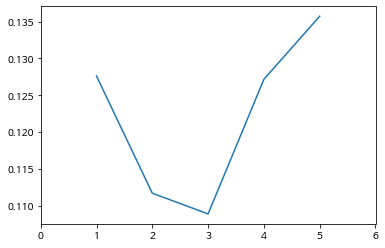

In [16]:
# degree 3이 가장 적당
# 차원이 증가함에 따라 계산량이 많아짐, 계산량이 많아지면 모델성능의 이득도 증가해야 함
# 차원이 증가할수록 모델에 대한 성능의 이득이 가장 많은 차원을 결정
plt.plot(evaluation_df["degree"], evaluation_df["mae"])
plt.xticks(list(range(len(evaluation_df)+2)))

plt.show()

# 선형회귀보다는 3차원으로 해석하는 것이 좋은데, 그렇게 해석하려고 하니 무엇이 문제인가?
# 선형회귀를 쓰자니 속도가 빠르고, 3차원으로 하자니 계산 양이 많아짐. -> 예측 속도에 대한 고민

- Modeling 3
> - xgboostRegressor에 CrossValidation 라이브러리 및 기본적인 하이퍼파라미터 설정을 통해 MAE스코어 계산
> - sklearn KFold 라이브러리를 이용하여 동일한 조건으로 xgboostRegressor에 대한 CrossValidation 진행한 MAE 스코어 계산
> - 두번의 BaseModel CrossValidation mae 스코어를 바탕으로 성능 개선 예정

In [17]:
def cal_xgb1(X,y):
    
    X_train, X_valid, y_train, y_valid = sep_xy(X,y)
    
    dtrain = xgb.DMatrix(X_train, label=y_train)
    params = {'booster':'gbtree',
                'gamma':0,
                'learning_rate':0.05,
                'max_depth':5,
                'min_child_weight':1,
                'n_jobs':-1,
                'objective':'reg:squaredlogerror',
                'reg_alpha':0,
              'eval_metric' : 'mae',
             'random_state':42}

    xgb_cv = xgb.cv(
      num_boost_round=100,
      params = params,
      dtrain = dtrain,
      nfold=5,
      as_pandas = True
    )
    
    return xgb_cv

In [18]:
cal_xgb1(X_train, y_train)

,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,0.256544,0.000056,0.256545,0.000225
1,0.244980,0.000053,0.244984,0.000213
2,0.234486,0.000048,0.234492,0.000199
3,0.224913,0.000043,0.224919,0.000185
4,0.216154,0.000040,0.216162,0.000172
...,...,...,...,...
95,0.104084,0.000040,0.104161,0.000126
96,0.104048,0.000040,0.104126,0.000127
97,0.104014,0.000042,0.104092,0.000126
98,0.103983,0.000043,0.104062,0.000124


In [19]:
# eval_set 하이퍼파라미터를 사용하면 아래와 같이 결과를 출력합니다

def cal_xgb2(X,y):       # x 자리에 X, y 자리에 y를 넣어야 함.

    model = xgb.XGBRegressor(
        n_estimators=100,
        booster='gbtree',
        gamma=0,
        learning_rate=0.05,
        max_depth=5,
        min_child_weight=1,
        n_jobs=-1,
        objective='reg:squaredlogerror',
        # 주의: XGBRegressor는 sklearn mean_absolute_error 사용 (안하면 출력은 reg:squaredlogerror 값만 출력 됨)
        # xgb.cv 같은 경우 'mae'로 설정해야 됩니다.
        eval_metric=mean_absolute_error,
        reg_alpha=0,
        random_state=42)

    scores = []
    folds = KFold(n_splits=5)

    for train_idx, val_idx in folds.split(X, y):
        X_train = X.iloc[train_idx, :]
        y_train = y.iloc[train_idx]

        X_val = X.iloc[val_idx, :]
        y_val = y.iloc[val_idx]

        model.fit(X_train, y_train, eval_set=[(X_val, y_val)])
        preds = model.predict(X_val)
        score = mean_absolute_error(y_val, preds)
        scores.append(score)
        
    return np.mean(scores)

In [20]:
cal_xgb2(X,y)

[0]	validation_0-rmsle:0.20663	validation_0-mean_absolute_error:0.25665
[1]	validation_0-rmsle:0.19746	validation_0-mean_absolute_error:0.24508
[2]	validation_0-rmsle:0.18915	validation_0-mean_absolute_error:0.23459
[3]	validation_0-rmsle:0.18159	validation_0-mean_absolute_error:0.22501
[4]	validation_0-rmsle:0.17470	validation_0-mean_absolute_error:0.21626
[5]	validation_0-rmsle:0.16840	validation_0-mean_absolute_error:0.20822
[6]	validation_0-rmsle:0.16263	validation_0-mean_absolute_error:0.20083
[7]	validation_0-rmsle:0.15732	validation_0-mean_absolute_error:0.19399
[8]	validation_0-rmsle:0.15245	validation_0-mean_absolute_error:0.18768
[9]	validation_0-rmsle:0.14800	validation_0-mean_absolute_error:0.18188
[10]	validation_0-rmsle:0.14388	validation_0-mean_absolute_error:0.17649
[11]	validation_0-rmsle:0.14012	validation_0-mean_absolute_error:0.17151
[12]	validation_0-rmsle:0.13665	validation_0-mean_absolute_error:0.16689
[13]	validation_0-rmsle:0.13346	validation_0-mean_absolute_er

[13]	validation_0-rmsle:0.13338	validation_0-mean_absolute_error:0.16255
[14]	validation_0-rmsle:0.13047	validation_0-mean_absolute_error:0.15860
[15]	validation_0-rmsle:0.12779	validation_0-mean_absolute_error:0.15491
[16]	validation_0-rmsle:0.12533	validation_0-mean_absolute_error:0.15152
[17]	validation_0-rmsle:0.12307	validation_0-mean_absolute_error:0.14834
[18]	validation_0-rmsle:0.12100	validation_0-mean_absolute_error:0.14541
[19]	validation_0-rmsle:0.11910	validation_0-mean_absolute_error:0.14267
[20]	validation_0-rmsle:0.11737	validation_0-mean_absolute_error:0.14015
[21]	validation_0-rmsle:0.11577	validation_0-mean_absolute_error:0.13778
[22]	validation_0-rmsle:0.11431	validation_0-mean_absolute_error:0.13558
[23]	validation_0-rmsle:0.11297	validation_0-mean_absolute_error:0.13355
[24]	validation_0-rmsle:0.11176	validation_0-mean_absolute_error:0.13166
[25]	validation_0-rmsle:0.11062	validation_0-mean_absolute_error:0.12987
[26]	validation_0-rmsle:0.10960	validation_0-mean_a

[26]	validation_0-rmsle:0.10963	validation_0-mean_absolute_error:0.12824
[27]	validation_0-rmsle:0.10869	validation_0-mean_absolute_error:0.12671
[28]	validation_0-rmsle:0.10784	validation_0-mean_absolute_error:0.12529
[29]	validation_0-rmsle:0.10704	validation_0-mean_absolute_error:0.12394
[30]	validation_0-rmsle:0.10632	validation_0-mean_absolute_error:0.12270
[31]	validation_0-rmsle:0.10566	validation_0-mean_absolute_error:0.12155
[32]	validation_0-rmsle:0.10506	validation_0-mean_absolute_error:0.12047
[33]	validation_0-rmsle:0.10450	validation_0-mean_absolute_error:0.11946
[34]	validation_0-rmsle:0.10400	validation_0-mean_absolute_error:0.11851
[35]	validation_0-rmsle:0.10352	validation_0-mean_absolute_error:0.11762
[36]	validation_0-rmsle:0.10309	validation_0-mean_absolute_error:0.11680
[37]	validation_0-rmsle:0.10270	validation_0-mean_absolute_error:0.11602
[38]	validation_0-rmsle:0.10235	validation_0-mean_absolute_error:0.11532
[39]	validation_0-rmsle:0.10203	validation_0-mean_a

[39]	validation_0-rmsle:0.10192	validation_0-mean_absolute_error:0.11459
[40]	validation_0-rmsle:0.10162	validation_0-mean_absolute_error:0.11398
[41]	validation_0-rmsle:0.10136	validation_0-mean_absolute_error:0.11341
[42]	validation_0-rmsle:0.10111	validation_0-mean_absolute_error:0.11287
[43]	validation_0-rmsle:0.10087	validation_0-mean_absolute_error:0.11234
[44]	validation_0-rmsle:0.10066	validation_0-mean_absolute_error:0.11186
[45]	validation_0-rmsle:0.10047	validation_0-mean_absolute_error:0.11142
[46]	validation_0-rmsle:0.10029	validation_0-mean_absolute_error:0.11101
[47]	validation_0-rmsle:0.10012	validation_0-mean_absolute_error:0.11060
[48]	validation_0-rmsle:0.09997	validation_0-mean_absolute_error:0.11023
[49]	validation_0-rmsle:0.09982	validation_0-mean_absolute_error:0.10988
[50]	validation_0-rmsle:0.09970	validation_0-mean_absolute_error:0.10956
[51]	validation_0-rmsle:0.09957	validation_0-mean_absolute_error:0.10924
[52]	validation_0-rmsle:0.09945	validation_0-mean_a

[52]	validation_0-rmsle:0.09946	validation_0-mean_absolute_error:0.10897
[53]	validation_0-rmsle:0.09935	validation_0-mean_absolute_error:0.10870
[54]	validation_0-rmsle:0.09925	validation_0-mean_absolute_error:0.10844
[55]	validation_0-rmsle:0.09916	validation_0-mean_absolute_error:0.10819
[56]	validation_0-rmsle:0.09908	validation_0-mean_absolute_error:0.10796
[57]	validation_0-rmsle:0.09900	validation_0-mean_absolute_error:0.10774
[58]	validation_0-rmsle:0.09892	validation_0-mean_absolute_error:0.10753
[59]	validation_0-rmsle:0.09885	validation_0-mean_absolute_error:0.10733
[60]	validation_0-rmsle:0.09879	validation_0-mean_absolute_error:0.10714
[61]	validation_0-rmsle:0.09873	validation_0-mean_absolute_error:0.10698
[62]	validation_0-rmsle:0.09868	validation_0-mean_absolute_error:0.10681
[63]	validation_0-rmsle:0.09863	validation_0-mean_absolute_error:0.10665
[64]	validation_0-rmsle:0.09858	validation_0-mean_absolute_error:0.10651
[65]	validation_0-rmsle:0.09853	validation_0-mean_a

0.10400791338393119

- Modeling 4
> - LightGBMRegressor에 CrossValidation 라이브러리 및 기본적인 하이퍼파라미터 설정을 통해 MAE스코어 계산
> - sklearn KFold 라이브러리를 이용하여 동일한 조건으로 LightGBMRegressor에 대한 CrossValidation 진행한 MAE 스코어 계산
> - 두번의 BaseModel CrossValidation mae 스코어를 바탕으로 성능 개선 예정

In [68]:
def cal_LGBM1(X,y):
    
    X_train, X_valid, y_train, y_valid = sep_xy(X,y)
    
    dtrain = lgb.Dataset(data=X_train, label=y_train)
    params = {'objective': 'regression', # 회귀
            'verbose': 0,
            'max_depth': 5,
            'learning_rate': 0.05,
            'n_estimators': 100,
            'min_child_samples': 5,
            'subsample': 0.4}

    lgb_cv = lgb.cv(
        params,
        dtrain,
        stratified=False,
        num_boost_round=100,
        nfold = 5)
    
    return lgb_cv

In [69]:
cal_LGBM1(X, y)

C:\Users\brown\miniforge3\envs\csw\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.

In [21]:
def cal_LGBM2(X,y):       # x 자리에 X, y 자리에 y를 넣어야 함.

    model = lgb.LGBMRegressor(
        objective = 'regression',
        verbose = 0,
        max_depth = 5,
        learning_rate= 0.05,
        n_estimators = 100,
        min_child_samples= 5,
        subsample = 0.4)

    scores = []
    folds = KFold(n_splits=5)

    for train_idx, val_idx in folds.split(X, y):
        X_train = X.iloc[train_idx, :]
        y_train = y.iloc[train_idx]

        X_val = X.iloc[val_idx, :]
        y_val = y.iloc[val_idx]

        model.fit(X_train, y_train, eval_set=[(X_val, y_val)])
        preds = model.predict(X_val)
        score = mean_absolute_error(y_val, preds)
        scores.append(score)
        
    return np.mean(scores)

In [22]:
cal_LGBM2(X,y)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.158156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's l2: 0.0874627
[2]	valid_0's l2: 0.0810589
[3]	valid_0's l2: 0.0752742
[4]	valid_0's l2: 0.0700475
[5]	valid_0's l2: 0.065327
[6]	valid_0's l2: 0.0610591
[7]	valid_0's l2: 0.0572029
[8]	valid_0's l2: 0.0537187
[9]	valid_0's l2: 0.0505667
[10]	valid_0's l2: 0.0477174
[11]	valid_0's l2: 0.0451375
[12]	valid_0's l2: 0.0428039
[13]	valid_0's l2: 0.0406893
[14]	valid_0's

[23]	valid_0's l2: 0.0279759
[24]	valid_0's l2: 0.0272724
[25]	valid_0's l2: 0.0266341
[26]	valid_0's l2: 0.0260437
[27]	valid_0's l2: 0.0255174
[28]	valid_0's l2: 0.0250339
[29]	valid_0's l2: 0.0246018
[30]	valid_0's l2: 0.0241993
[31]	valid_0's l2: 0.0238382
[32]	valid_0's l2: 0.02351
[33]	valid_0's l2: 0.0232125
[34]	valid_0's l2: 0.0229348
[35]	valid_0's l2: 0.0226893
[36]	valid_0's l2: 0.0224667
[37]	valid_0's l2: 0.0222598
[38]	valid_0's l2: 0.022072
[39]	valid_0's l2: 0.0219021
[40]	valid_0's l2: 0.0217429
[41]	valid_0's l2: 0.0216011
[42]	valid_0's l2: 0.0214665
[43]	valid_0's l2: 0.0213457
[44]	valid_0's l2: 0.021233
[45]	valid_0's l2: 0.0211349
[46]	valid_0's l2: 0.0210416
[47]	valid_0's l2: 0.0209555
[48]	valid_0's l2: 0.0208771
[49]	valid_0's l2: 0.0208076
[50]	valid_0's l2: 0.020744
[51]	valid_0's l2: 0.0206814
[52]	valid_0's l2: 0.020623
[53]	valid_0's l2: 0.0205697
[54]	valid_0's l2: 0.0205213
[55]	valid_0's l2: 0.0204758
[56]	valid_0's l2: 0.0204323
[57]	valid_0's l2: 0

[65]	valid_0's l2: 0.0201291
[66]	valid_0's l2: 0.0201069
[67]	valid_0's l2: 0.0200879
[68]	valid_0's l2: 0.0200711
[69]	valid_0's l2: 0.0200533
[70]	valid_0's l2: 0.0200363
[71]	valid_0's l2: 0.0200204
[72]	valid_0's l2: 0.0200069
[73]	valid_0's l2: 0.0199918
[74]	valid_0's l2: 0.0199793
[75]	valid_0's l2: 0.0199659
[76]	valid_0's l2: 0.0199538
[77]	valid_0's l2: 0.0199435
[78]	valid_0's l2: 0.019933
[79]	valid_0's l2: 0.0199224
[80]	valid_0's l2: 0.0199137
[81]	valid_0's l2: 0.0199045
[82]	valid_0's l2: 0.0198976
[83]	valid_0's l2: 0.019888
[84]	valid_0's l2: 0.0198792
[85]	valid_0's l2: 0.0198697
[86]	valid_0's l2: 0.0198622
[87]	valid_0's l2: 0.0198547
[88]	valid_0's l2: 0.0198491
[89]	valid_0's l2: 0.0198426
[90]	valid_0's l2: 0.0198355
[91]	valid_0's l2: 0.0198289
[92]	valid_0's l2: 0.0198228
[93]	valid_0's l2: 0.0198172
[94]	valid_0's l2: 0.0198112
[95]	valid_0's l2: 0.0198069
[96]	valid_0's l2: 0.0198013
[97]	valid_0's l2: 0.0197952
[98]	valid_0's l2: 0.0197915
[99]	valid_0's l

0.10454179815186486

##### 2차
1. 동맹 인원수에 따른 게임 방식 적용 : 
> - 아래의 column 각각에 대해 numerical column으로 변환 및 데이터프레임에 새로운 column으로 추가하여 시뮬레이션
> - matchType : matchType 데이터에 포함된 키워드 기준으로 분류
> - numGroup : numGroup 데이터 값을 기준으로 분류
> - groupId : 동일한 groupId를 갖는 데이터의 수를 집계하여 분류

2. 이상치 제거 적용
> - IQR 방식
> - 상위 0.5% 초과 수치에 대한 삭제하는 방식
> - boxplot을 통한 rough한 방식

#### 인원수에 따른 게임 방식 적용

In [41]:
# 대상 DataFrame

## matchType column 적용
train_mt = pd.read_csv(base_path + 'train_02_01.matchType.csv')
## numGroup column 적용
train_n = pd.read_csv(base_path + 'train_02_02.numGroup.csv')
## group Id column 적용
train_g = pd.read_csv(base_path + 'train_02_03.groupId.csv')

In [45]:
# 각각의 DataFrame에 대해 기본 전처리

# Objective, Categorical type의 column은 모두 제거
train_mt = train_mt.drop(columns = ['Id', 'groupId', 'matchId'])

train_n = train_n.drop(columns = ['Id', 'groupId', 'matchId', 'matchType'])

train_g = train_g.drop(columns = ['Id', 'groupId', 'matchId', 'matchType'])

In [75]:
## matchType column 적용

X = x(train_mt)
y = y(train_mt)

# LinearRegression
LR = cal_mae(X, y, LinearRegression)
# XGBRegressor
XGBR = cal_mae(X, y, XGBRegressor)
# LGBMRegressor
LGB = cal_mae(X, y, LGBMRegressor)

print(f'Linear Regressor :  mae = {LR}')
print(f'XGBRegressor :  mae = {XGBR}')
print(f'LGBMRegressor :  mae = {LGB}')


Linear Regressor :  mae = 0.11488416411690845
XGBRegressor :  mae = 0.09021033050582318
LGBMRegressor :  mae = 0.09070401372307278


In [76]:
## numGroup column 적용

X = x(train_n)
y = y(train_n)

# LinearRegression
LR = cal_mae(X, y, LinearRegression)
# XGBRegressor
XGBR = cal_mae(X, y, XGBRegressor)
# LGBMRegressor
LGB = cal_mae(X, y, LGBMRegressor)

print(f'Linear Regressor :  mae = {LR}')
print(f'XGBRegressor :  mae = {XGBR}')
print(f'LGBMRegressor :  mae = {LGB}')


Linear Regressor :  mae = 0.11524394439200936
XGBRegressor :  mae = 0.09026390940943259
LGBMRegressor :  mae = 0.09077758139836267


In [80]:
## group Id column 적용

X = x(train_g)
y = y(train_g)

# LinearRegression
LR = cal_mae(X, y, LinearRegression)
# XGBRegressor
XGBR = cal_mae(X, y, XGBRegressor)
# LGBMRegressor
LGB = cal_mae(X, y, LGBMRegressor)

print(f'Linear Regressor :  mae = {LR}')
print(f'XGBRegressor :  mae = {XGBR}')
print(f'LGBMRegressor :  mae = {LGB}')


Linear Regressor :  mae = 0.11470541467514797
XGBRegressor :  mae = 0.08989658002748839
LGBMRegressor :  mae = 0.09049043098833695


#### 이상치 제거 방식 3가지

In [81]:
train = pd.read_csv(base_path + 'train_00.base.csv')
train

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.00,0,0,0,1241,0,0,0.00,1306,28,26,-1,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,0,0,91.47,0,0,0,0,0,0,0.00,1777,26,25,1484,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1,0,68.00,0,0,0,0,0,0,0.00,1318,50,47,1491,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,0,0,32.90,0,0,0,0,0,0,0.00,1436,31,30,1408,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,0,0,100.00,0,0,0,0,1,1,58.53,1424,97,95,1560,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446960,0,0,0.00,0,0,0,1029,0,0,0.00,1873,29,28,-1,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446961,0,1,44.15,0,0,0,0,0,0,0.00,1435,93,93,1501,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446962,0,0,59.06,0,0,0,0,0,0,0.00,1321,28,28,1500,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446963,0,4,180.40,1,1,2,0,2,1,98.50,1373,26,25,1418,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [82]:
# 이상치 제거 1. IQR방식 이용

def outlier1_print(df):      # 몇 개 삭제했는지 확인 시 사용
    df = df.copy()
    remove = []
    for i in df.columns[:-1]:

        quantile_25 = np.percentile(df[i].values, 25)
        quantile_75 = np.percentile(df[i].values, 75)

        IQR = quantile_75 - quantile_25
        IQR_weight = IQR*1.5

        lowest = quantile_25 - IQR_weight
        highest = quantile_75 + IQR_weight

        outlier_idx = df[i][ (df[i] < lowest) | (df[i] > highest) ].index
        df = df.drop(outlier_idx, axis=0)
        remove.append(len(outlier_idx))
        print(f'{i} 컬럼의 이상치로 {len(outlier_idx)}개의 data를 삭제하였습니다.')
    print(f'데이터프레임의 이상치로 총 {sum(remove)}개의 data를 삭제하였습니다.')
    return df

def outlier1(df):
    df = df.copy()
    for i in df.columns[:-1]:

        quantile_25 = np.percentile(df[i].values, 25)
        quantile_75 = np.percentile(df[i].values, 75)

        IQR = quantile_75 - quantile_25
        IQR_weight = IQR*1.5

        lowest = quantile_25 - IQR_weight
        highest = quantile_75 + IQR_weight

        outlier_idx = df[i][ (df[i] < lowest) | (df[i] > highest) ].index
        df = df.drop(outlier_idx, axis=0)
    return df

# 참고 : https://hwi-doc.tistory.com/entry/IQR-방식을-이용한-이상치-데이터Outlier-제거

In [89]:
train_out1 = outlier1(train)

X = x(train_out1)
y = y(train_out1)
display(X)
display(y)

assists 컬럼의 이상치로 779306개의 data를 삭제하였습니다.
boosts 컬럼의 이상치로 462555개의 data를 삭제하였습니다.
damageDealt 컬럼의 이상치로 140354개의 data를 삭제하였습니다.
DBNOs 컬럼의 이상치로 31550개의 data를 삭제하였습니다.
headshotKills 컬럼의 이상치로 261897개의 data를 삭제하였습니다.
heals 컬럼의 이상치로 639469개의 data를 삭제하였습니다.
killPoints 컬럼의 이상치로 0개의 data를 삭제하였습니다.
kills 컬럼의 이상치로 380965개의 data를 삭제하였습니다.
killStreaks 컬럼의 이상치로 0개의 data를 삭제하였습니다.
longestKill 컬럼의 이상치로 0개의 data를 삭제하였습니다.
matchDuration 컬럼의 이상치로 255개의 data를 삭제하였습니다.
maxPlace 컬럼의 이상치로 316196개의 data를 삭제하였습니다.
numGroups 컬럼의 이상치로 845개의 data를 삭제하였습니다.
rankPoints 컬럼의 이상치로 6개의 data를 삭제하였습니다.
revives 컬럼의 이상치로 54338개의 data를 삭제하였습니다.
rideDistance 컬럼의 이상치로 169508개의 data를 삭제하였습니다.
roadKills 컬럼의 이상치로 0개의 data를 삭제하였습니다.
swimDistance 컬럼의 이상치로 23899개의 data를 삭제하였습니다.
teamKills 컬럼의 이상치로 11527개의 data를 삭제하였습니다.
vehicleDestroys 컬럼의 이상치로 242개의 data를 삭제하였습니다.
walkDistance 컬럼의 이상치로 140141개의 data를 삭제하였습니다.
weaponsAcquired 컬럼의 이상치로 12969개의 data를 삭제하였습니다.
winPoints 컬럼의 이상치로 0개의 data를 삭제하였습니다.
데이터프레임의 이상치로 총 3426022개의 data를 삭제하였습니다

In [92]:
# LinearRegression
LR = cal_mae(X, y, LinearRegression)
# XGBRegressor
XGBR = cal_mae(X, y, XGBRegressor)
# LGBMRegressor
LGB = cal_mae(X, y, LGBMRegressor)

print(f'Linear Regressor :  mae = {LR}')
print(f'XGBRegressor :  mae = {XGBR}')
print(f'LGBMRegressor :  mae = {LGB}')

Linear Regressor :  mae = 0.10154406141878924
XGBRegressor :  mae = 0.09612148187507634
LGBMRegressor :  mae = 0.09616743381598894


In [93]:
# 99% 초과 수치에 대한 삭제


# 함수 생성
#    1) 지정한 column에서 원하는 %의 수치에 대한 상위값 추출하여 list로 반환
#    2) 지정한 column 각각에 대해 상위값보다 큰 값들은 모두 제거

def outlier2_print(df, want_per):
    df = df.copy()
    columns_list = df.columns[:-1]
    remove = []    
    value_list = []
    
    for i in columns_list:
        value_list.append(df[i].quantile(want_per))
    
    for j in range(len(value_list)):
        outlier_idx = df[columns_list[j]][df[columns_list[j]] > value_list[j]].index
        df = df.drop(outlier_idx, axis=0)
        remove.append(len(outlier_idx))
        print(f'{columns_list[j]} 컬럼의 이상치로 값이 {value_list[j]} 보다 큰 {len(outlier_idx)}개의 data를 삭제하였습니다.')
    print(f'데이터프레임의 이상치로 총 {sum(remove)}개의 data를 삭제하였습니다.')
    return df

def outlier2(df, want_per):
    df = df.copy()
    columns_list = df.columns[:-1]
    value_list = []
    
    for i in columns_list:
        value_list.append(df[i].quantile(want_per))
    
    for j in range(len(value_list)):
        outlier_idx = df[columns_list[j]][df[columns_list[j]] > value_list[j]].index
        df = df.drop(outlier_idx, axis=0)
    return df

In [101]:
train_out2 = outlier2(train, 0.995)

X = x(train_out2)
y = y(train_out2)
display(X)
display(y)

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,0,0,0.00,0,0,0,1241,0,0,0.00,1306,28,26,-1,0,0.0000,0,0.000,0,0,244.80,1,1466
1,0,0,91.47,0,0,0,0,0,0,0.00,1777,26,25,1484,0,0.0045,0,11.040,0,0,1434.00,5,0
2,1,0,68.00,0,0,0,0,0,0,0.00,1318,50,47,1491,0,0.0000,0,0.000,0,0,161.80,2,0
3,0,0,32.90,0,0,0,0,0,0,0.00,1436,31,30,1408,0,0.0000,0,0.000,0,0,202.70,3,0
4,0,0,100.00,0,0,0,0,1,1,58.53,1424,97,95,1560,0,0.0000,0,0.000,0,0,49.75,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446960,0,0,0.00,0,0,0,1029,0,0,0.00,1873,29,28,-1,0,1292.0000,0,0.000,0,0,1019.00,3,1507
4446961,0,1,44.15,0,0,0,0,0,0,0.00,1435,93,93,1501,0,0.0000,0,0.000,0,0,81.70,6,0
4446962,0,0,59.06,0,0,0,0,0,0,0.00,1321,28,28,1500,0,0.0000,0,2.184,0,0,788.70,4,0
4446963,0,4,180.40,1,1,2,0,2,1,98.50,1373,26,25,1418,2,0.0000,0,0.000,0,0,2748.00,8,0


,winPlacePerc
0,0.4444
1,0.6400
2,0.7755
3,0.1667
4,0.1875
...,...
4446960,0.1786
4446961,0.2935
4446962,0.4815
4446963,0.8000


In [102]:
# LinearRegression
LR = cal_mae(X, y, LinearRegression)
# XGBRegressor
XGBR = cal_mae(X, y, XGBRegressor)
# LGBMRegressor
LGB = cal_mae(X, y, LGBMRegressor)

print(f'Linear Regressor :  mae = {LR}')
print(f'XGBRegressor :  mae = {XGBR}')
print(f'LGBMRegressor :  mae = {LGB}')

Linear Regressor :  mae = 0.11172728250278784
XGBRegressor :  mae = 0.09046054325100485
LGBMRegressor :  mae = 0.09088522254676432


In [55]:
# 컬럼별 수치 지정을 통한 이상치 제거

# boosts : 25 이상 제거
# damageDealt : 3200 이상 제거
# heals : 60 이상 제거
# kills : 25 이상 제거
# walkDistance : 15000 이상 제거
# weaponAcquired : 150 이상 제거

def outlier3(df, columns_list, std_list):
    df = df.copy()
    remove = []    
    
    for j in range(len(std_list)):
        outlier_idx = df[columns_list[j]][df[columns_list[j]] > std_list[j]].index
        df = df.drop(outlier_idx, axis=0)
        remove.append(len(outlier_idx))
        print(f'{columns_list[j]} 컬럼의 이상치로 {len(outlier_idx)}개의 data를 삭제하였습니다.')
    print(f'데이터프레임의 이상치로 총 {sum(remove)}개의 data를 삭제하였습니다.')
    return df

In [56]:
train_g

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,kills,killStreaks,longestKill,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.00,0,0,0,1241,0,0,0.00,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,0,0,91.47,0,0,0,0,0,0,0.00,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1,0,68.00,0,0,0,0,0,0,0.00,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,0,0,32.90,0,0,0,0,0,0,0.00,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,0,0,100.00,0,0,0,0,1,1,58.53,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.00,0,0,0,1029,0,0,0.00,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,0,1,44.15,0,0,0,0,0,0,0.00,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,0,0,59.06,0,0,0,0,0,0,0.00,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,0,4,180.40,1,1,2,0,2,1,98.50,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000
